<a href="https://colab.research.google.com/github/Lamyae19/Time-Series-Analysis-Air-Passengers/blob/main/Mini_Projet_S%C3%A9ries_Temporelles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mini Projet :
 Analyse des Données d'une série temporelle sur les passagers aériens.
## Objectif :
  Analyser la série temporelle des passagers aériens pour en extraire des informations
pertinentes.

# Étape 1 : Chargement des données

##1. Importez les bibliothèques nécessaires (par exemple, `pandas`,`numpy`, `matplotlib`,`statsmodels`).

In [ ]:
# Importez les bibliothèques nécessaires (par exemple, pandas,numpy, matplotlib,statsmodels)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import statsmodels.api as sm

## 2. Chargez le jeu de données à partir d'un fichier CSV ou d'une source de données en ligne.

In [ ]:

#"AirPassengers.csv"
!gdown 1KO5VoupI2tek30mEorDI_29c6t0UVdDJ
# Lecture d’une série temporelle
data = pd.read_csv('AirPassengers.csv', parse_dates=True, index_col='Month')



Downloading...
From: https://drive.google.com/uc?id=1KO5VoupI2tek30mEorDI_29c6t0UVdDJ
To: /content/AirPassengers.csv
100% 1.75k/1.75k [00:00<00:00, 5.87MB/s]


## 3. Vérifiez les premières lignes des données pour vous assurer qu'elles sont correctement chargées.

In [ ]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [ ]:
data.tail(3)

,#Passengers
Month,
1960-10-01,461
1960-11-01,390
1960-12-01,432


# Étape 2 : Visualisation des données


## 1. Tracez la série temporelle des températures.

In [ ]:
#Etape1: Création d’une série temporelle

date_rng = pd.date_range(start='2023-01-01', end='2023-01-10', freq='D')
series = pd.Series(range(len(date_rng)), index=date_rng)
print(series)

2023-01-01    0
2023-01-02    1
2023-01-03    2
2023-01-04    3
2023-01-05    4
2023-01-06    5
2023-01-07    6
2023-01-08    7
2023-01-09    8
2023-01-10    9
Freq: D, dtype: int64


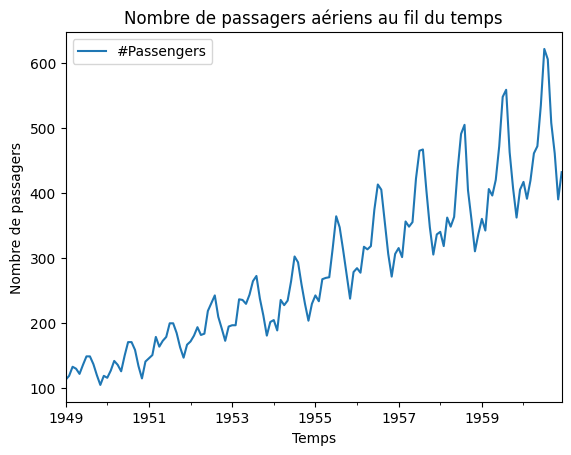

In [ ]:
import matplotlib.pyplot as plt

#Etape2: Visualisation
data.plot()
plt.title('Nombre de passagers aériens au fil du temps')
plt.xlabel('Temps')
plt.ylabel('Nombre de passagers')
plt.show()

# Étape 3 : Les opérations sur la série temporelle

## 1. Réechantillonage : réechantilloner des données pour obtenir une vue annuelle des passagers.

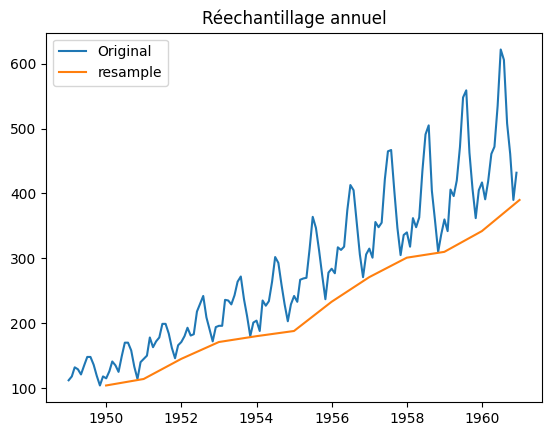

In [ ]:
resample = data.resample('YE').min()
plt.plot(data, label='Original')
plt.plot(resample, label='resample')
plt.title('Réechantillage annuel')  # Ajouter un titre
plt.legend()
plt.show()


## 2. Déplacement : Décalage des passengers de cinq mois en avant.

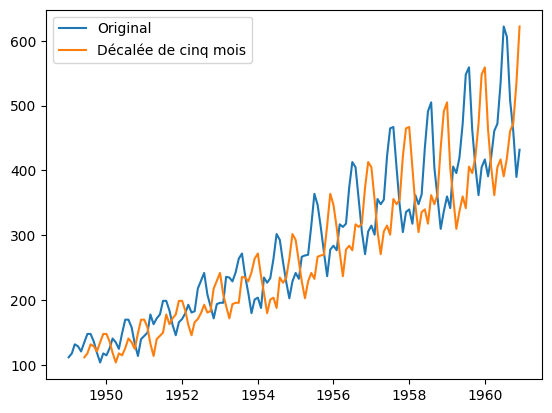

In [ ]:
shifted_data = data.shift(5)
plt.plot(data, label='Original')
plt.plot(shifted_data, label='Décalée de cinq mois')
plt.legend()
plt.show()



## 3. Windowing : choisissez une fenêtre de 5 window pour faire le lissage.

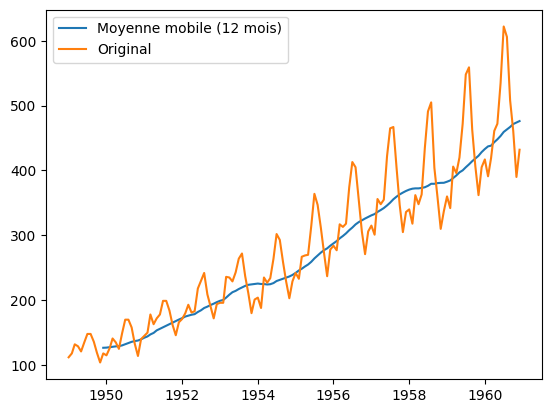

In [ ]:
rolling_mean = data.rolling(window=12).mean()
plt.plot(rolling_mean,label='Moyenne mobile (12 mois)')
plt.plot(data,label='Original')
plt.legend()
plt.show()

## 4. Séléction des dates où le nombre de passagers est inférieur à 120.

In [ ]:
# Séléction des dates où le nombre de passagers est inférieur à 120.
selection = data[data['#Passengers'] < 120]
print(selection)

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-10-01          119
1949-11-01          104
1949-12-01          118
1950-01-01          115
1950-11-01          114


# Étape 4 : Vérification de la stationnarité de cette série temporelle

## 1. Tracez la courbe de la moyenne mobile.


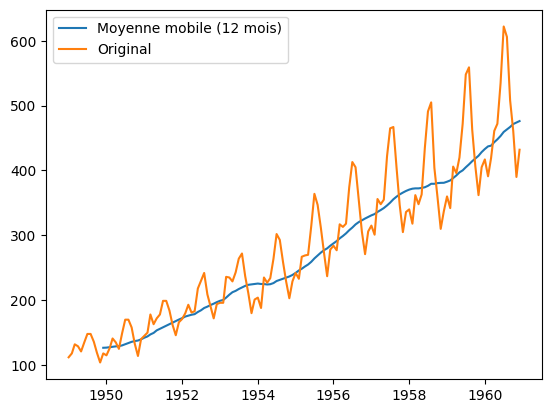

In [ ]:
# Tracez la courbe de la moyenne mobile.
rolling_mean = data.rolling(window=12).mean()
plt.plot(rolling_mean,label='Moyenne mobile (12 mois)')
plt.plot(data,label='Original')
plt.legend()

## 2. Tracez la courbe de la variance mobile

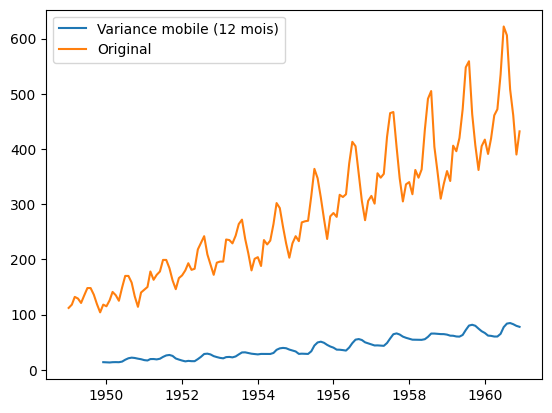

In [ ]:
#  Tracez la courbe de la variance mobile
rolling_std = data.rolling(window=12).std()
plt.plot(rolling_std,label='Variance mobile (12 mois)')
plt.plot(data,label='Original')
plt.legend()
plt.show()

## 3. Utiliser le test ADF (Dickey-Fuller) pour vérifier la stationnarité.

In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(data['#Passengers'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('La série est stationnaire' if result[1] <= 0.05 else 'La série n\'est pas stationnaire')

ADF Statistic: 0.8153688792060498
p-value: 0.991880243437641
La série n'est pas stationnaire


# Étape 5 : Rendre le série temporelle

## 1. Différenciation temporelle.

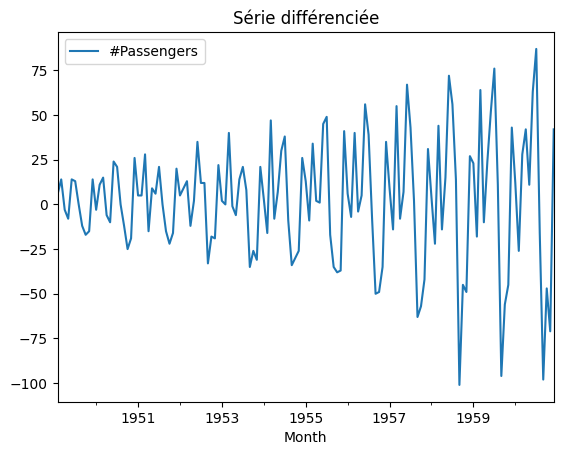

In [ ]:
differenced_data = data.diff().dropna()
differenced_data.plot()
plt.title('Série différenciée')
plt.show()


## 2. Transformation logarithmique.

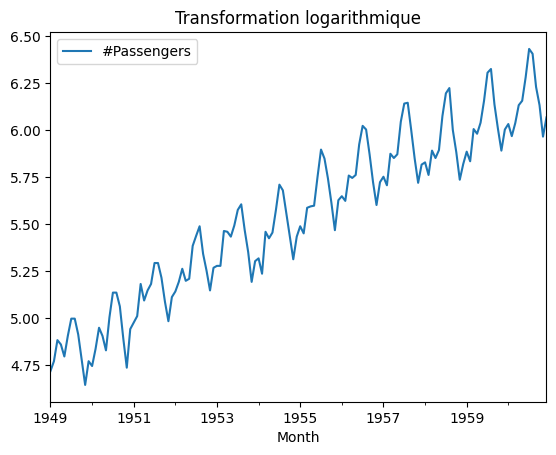

In [ ]:
log_data = np.log(data)
log_data.plot()
plt.title('Transformation logarithmique')
plt.show()

## 3. Décomposition de la série temporelle :


### a. Décomposez la série temporelle en ses composantes (tendance, saisonnalité, résidu) à l'aide de la décomposition STL (`statsmodels.tsa.seasonal_decompose`).

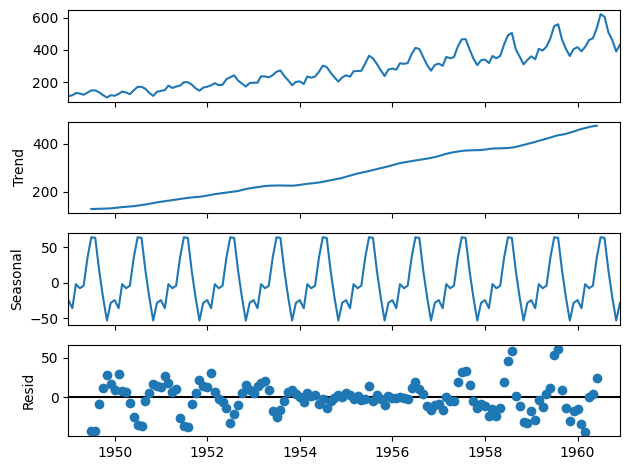

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(data, model='additive')
decomposition.plot()
plt.show()

### b. Visualisez chacune des composantes séparément.

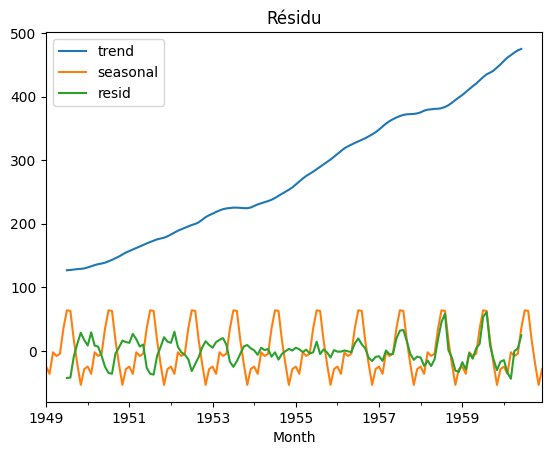

In [ ]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
trend.plot(title='Tendance')
seasonal.plot(title='Saisonnalité')
residual.plot(title='Résidu')
plt.legend()
plt.show()

# Étape 6 : Autocorrélation

## 1. Calculez l'autocorrélation (ACF) et l'autocorrélation partielle (PACF) pour déterminer le modèle ARIMA approprié.

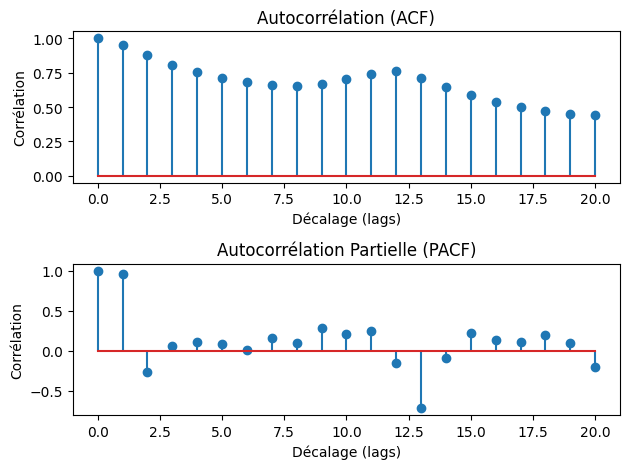

In [ ]:
from statsmodels.graphics.tsaplots import acf, pacf


acf_values = acf(data, nlags=20)
pacf_values = pacf(data, nlags=20)

# Tracé de l'ACF et de la PACF
plt.subplot(2, 1, 1)
plt.stem(acf_values)
plt.title('Autocorrélation (ACF)')
plt.xlabel('Décalage (lags)')
plt.ylabel('Corrélation')

plt.subplot(2, 1, 2)
plt.stem(pacf_values)
plt.title('Autocorrélation Partielle (PACF)')
plt.xlabel('Décalage (lags)')
plt.ylabel('Corrélation')

plt.tight_layout()
plt.show()


# Étape 7 : Modélisation

## 1. Choisissez un modèle ARIMA approprié (par exemple, ARIMA(1,1,1)) et faites le training.

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(1, 1, 1))  # Remplacez les paramètres (p, d, q) selon l'analyse
results = model.fit()
print(results.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Tue, 04 Feb 2025   AIC                           1394.683
Time:                        22:59:07   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

# Étape 8 : Prévisions


## 1. Utilisez le modèle ajusté pour faire des prévisions sur les 12 mois suivants.

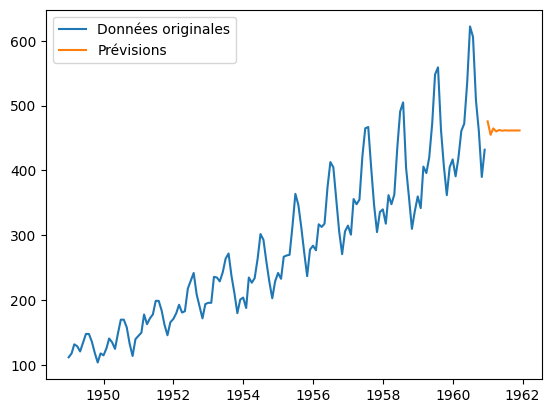

In [ ]:
# 1. Utilisez le modèle ajusté pour faire des prévisions sur les 12 mois suivants.
forecast = results.forecast(steps=12)
plt.plot(data, label='Données originales')
plt.plot(forecast, label='Prévisions')
plt.legend()
plt.show()

# Étape 9 : Interprétation des résultats


## 1. Discutez des résultats obtenus.


In [ ]:
# 1. Discutez des résultats obtenus.
print(results.summary())


                               SARIMAX Results                                
Dep. Variable:            #Passengers   No. Observations:                  144
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -694.341
Date:                Tue, 04 Feb 2025   AIC                           1394.683
Time:                        22:59:33   BIC                           1403.571
Sample:                    01-01-1949   HQIC                          1398.294
                         - 12-01-1960                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4742      0.123     -3.847      0.000      -0.716      -0.233
ma.L1          0.8635      0.078     11.051      0.000       0.710       1.017
sigma2       961.9270    107.433      8.954      0.0

## 2. Quels sont les principaux facteurs influençant le nombre des passagers ?

Les principaux facteurs influençant le nombre de passagers sont la tendance (croissance à long terme), la saisonnalité (variations régulières liées aux périodes de l'année), et potentiellement des événements non prévus reflétés dans les résidus.  L'analyse ACF/PACF permet d'identifier des dépendances temporelles à prendre en compte dans un modèle prédictif, qui pourraient correspondre à d'autres facteurs.


## 3. Y a-t-il des tendances notables que vous avez observées ?


### Les tendances notables observées dans la série temporelle des passagers aériens sont :

 1. Tendance à la hausse :  Globalement, le nombre de passagers aériens a augmenté au fil du temps, ce qui est clairement visible sur le graphique de la série temporelle originale et confirmé par la composante de tendance de la décomposition.

 2. Saisonnalité marquée : On observe une saisonnalité annuelle très prononcée, avec des pics de passagers pendant les mois d'été et des creux pendant les mois d'hiver. Cela est mis en évidence par la composante saisonnière de la décomposition et par l'ACF.

3. Variations cycliques : Il semble y avoir une croissance exponentielle.

Ces observations suggèrent que des facteurs saisonniers et une tendance à long terme influencent fortement les données. Pour faire des prédictions précises, un modèle qui tient compte de ces éléments, comme un modèle ARIMA ou SARIMA, est justifié.